In [2]:
import numpy as np 
import pandas as pd 

In [3]:
path_to_data = '/Users/enzo-macmini/PythonProjects/JMP/FoxBajari_Data/data/'

In [37]:
### airtravel data

df_air_travel = pd.read_csv(path_to_data + 'air-travel-passengers-bta-year-1994.csv')
print(np.shape(df_air_travel))

### travel data
df_travel_survery = pd.read_csv(path_to_data + 'american-travel-survey-1995-zero.csv')
print(np.shape(df_travel_survery))

### adjacency matrix
btamatrix_merged = pd.read_csv(path_to_data + 'btamatrix_merged.csv')
print(np.shape(btamatrix_merged))


geo_distance = pd.read_csv(path_to_data + 'geographic-distance-population-weighted-centroid.csv')
print(np.shape(geo_distance))

### bta data
bta_data = pd.read_csv(path_to_data + 'btadata_2004_03_12_1.csv')
print(bta_data.head())

bidder_data = pd.read_csv(path_to_data + 'biddercblk_03_28_2004_pln.csv')
print(bidder_data.head())

(492, 493)
(492, 493)
(492, 494)
(492, 493)
   bta    market        bid    winner  bidder_num_fox     pop90  percapin  \
0    1  Aberdeen   411666.0       MCG             202   88891.0   14926.0   
1    2  Aberdeen   471750.0  CookWest             184   83057.0   16374.0   
2    3  Abilene,  4024583.0   PokaLam             164  253174.0   15377.0   
3    4   Ada, OK   783000.0     OnQue             238   52677.0   12644.0   
4    5   Adrian,   701250.0       DCR             190   91476.0   16069.0   

   hhinc35k     density  imwl  
0     0.405    7.536484     9  
1     0.433   55.249180     3  
2     0.421   54.129910    14  
3     0.318   32.020280     0  
4     0.530  256.705900     0  
   bidder_num_fox  bidder_num                      co_name  pops_eligible
0               1        2000     MLCS Industries II, Inc.   3.777778e+06
1               2        2001        MLCS Industries, Inc.   4.222222e+05
2               3        2004     Holland Wireless, L.L.C.   3.166330e+05
3    

In [45]:
# take column pops_eligible to np array
pop_elig_i = np.array(bidder_data['pops_eligible'])

# take rows where pops_eligible is nan
bidder_data_nan = bidder_data[bidder_data['pops_eligible'].isnull()]
print('Bidders with null eligibility: ',bidder_data_nan['co_name'].values)

pop_elig_i_nonan = pop_elig_i[~np.isnan(pop_elig_i)]

print("Unique eligibility values: ", len(np.unique(pop_elig_i_nonan)), 
      ' over ', len(pop_elig_i_nonan) , ' bidders')

print("######")
print("Population statistics")
print(bta_data['pop90'].mean())
print(bta_data['pop90'].std())

print(bta_data['pop90'].min())
print(bta_data['pop90'].max())

Bidders with null eligibility:  ['South Central Utah Telephone Association' 'FCC']
Unique eligibility values:  213  over  254  bidders
######
Population statistics
512284.5720081136
1300576.8298108946
27512.0
18100000.0


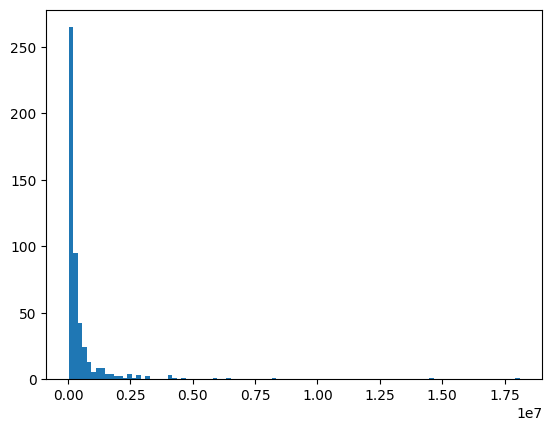

In [56]:
# plot histogram of poulation
import matplotlib.pyplot as plt
plt.hist(bta_data['pop90'], bins=100)
plt.show()

In [73]:
pop_bins

array([       0.        ,   301666.66666667,   603333.33333333,
         905000.        ,  1206666.66666667,  1508333.33333333,
        1810000.        ,  2111666.66666667,  2413333.33333333,
        2715000.        ,  3016666.66666667,  3318333.33333333,
        3620000.        ,  3921666.66666667,  4223333.33333333,
        4525000.        ,  4826666.66666667,  5128333.33333333,
        5430000.        ,  5731666.66666667,  6033333.33333333,
        6335000.        ,  6636666.66666667,  6938333.33333333,
        7240000.        ,  7541666.66666667,  7843333.33333333,
        8145000.        ,  8446666.66666667,  8748333.33333333,
        9050000.        ,  9351666.66666667,  9653333.33333333,
        9955000.        , 10256666.66666667, 10558333.33333333,
       10860000.        , 11161666.66666667, 11463333.33333333,
       11765000.        , 12066666.66666667, 12368333.33333333,
       12670000.        , 12971666.66666667, 13273333.33333333,
       13575000.        , 13876666.66666

Tick:  301666.6666666667


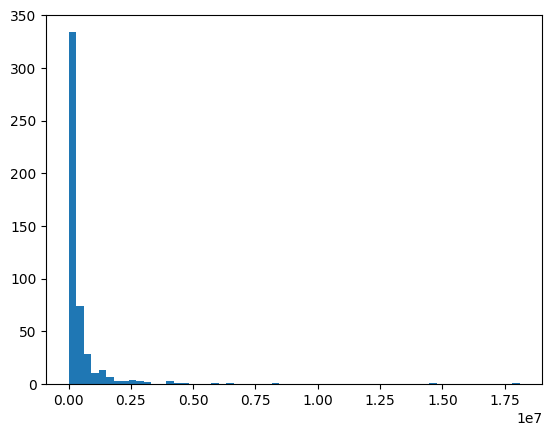

licenses in tick  1  :  74
licenses in tick  2  :  29
licenses in tick  3  :  11
licenses in tick  4  :  13
licenses in tick  5  :  7
licenses in tick  6  :  3
licenses in tick  7  :  3
licenses in tick  8  :  4
licenses in tick  9  :  3


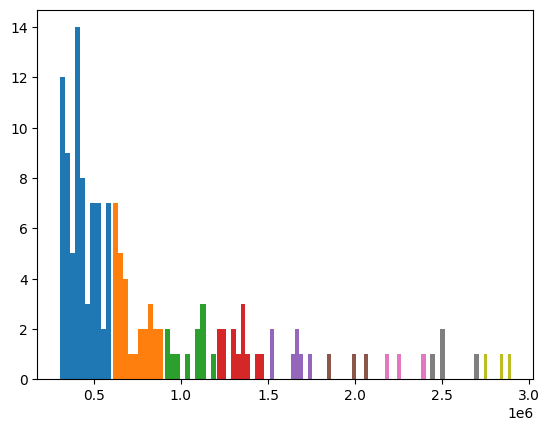

In [84]:

num_bins = 60
tick = bta_data['pop90'].max()/num_bins
print('Tick: ' , tick)

pop_bins = np.linspace(0, bta_data['pop90'].max(), num_bins +1)
plt.hist(bta_data['pop90'], bins=pop_bins)
plt.show()



# add up to the num_ticks tick
num_ticks = 10
for i in range(1, num_ticks):
    print('licenses in tick ', i, ' : ', len(bta_data['pop90'][(bta_data['pop90'] > i*tick) & (bta_data['pop90'] <= (i+1)*tick)]))
    plt.hist(bta_data['pop90'][(bta_data['pop90'] > i*tick) & (bta_data['pop90'] <= (i+1)*tick)])


plt.show()

In [11]:
print(bta_data['pop90'].sum())

bidder_data[bidder_data['pops_eligible'] > bta_data['pop90'].sum() /2]

252556294.0


,bidder_num_fox,bidder_num,co_name,pops_eligible
76,77,2146,NextWave Personal Communications Inc.,176055555.6
247,248,2372,U.S. AirWaves Holdings Inc.,180611430.0


In [12]:
# bta where pop90 is bta_data['pop90'].max()
bta_data_maxpop = bta_data[bta_data['pop90'] >= .8 * bta_data['pop90'].max()]
print(bta_data_maxpop)

     bta    market          bid    winner  bidder_num_fox       pop90  \
261  262  Los Ange  664000000.0  NextWave              77  14500000.0   
320  321  New York  994000000.0  NextWave              77  18100000.0   

     percapin  hhinc35k   density  imwl  
261   20622.0     0.629  5578.848    52  
320   25673.0     0.652  6497.588    15  


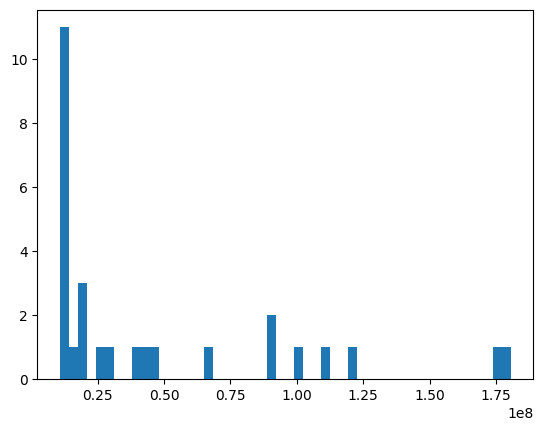

In [ ]:
# plot histogram of pop_elig_i_nonan



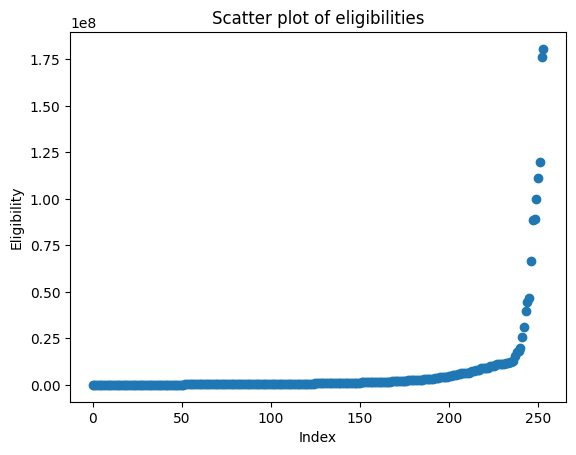

In [14]:
# scatter the eligibilities
import matplotlib.pyplot as plt

plt.scatter(range(len(pop_elig_i_nonan)), np.sort(pop_elig_i_nonan))
plt.xlabel('Index')
plt.ylabel('Eligibility')
plt.title('Scatter plot of eligibilities')
plt.show()

In [15]:
# scatter the eligibilities



# plt.hist(pop_elig_i_nonan[pop_elig_i_nonan < np.sort(pop_elig_i_nonan)[-2]], bins=20)
# plt.show()